In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
# Display the first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [15]:
# Data preprocessing
# Convert categorical variables to numerical
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                 'PaymentMethod'], drop_first=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   object 
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [20]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [26]:
df.isna().sum()

customerID                                0
SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [27]:
df.shape

(7043, 32)

In [28]:
df = df.dropna(subset='TotalCharges')

In [29]:
# Split the dataset into features and target
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.7846481876332623
Precision: 0.6254416961130742
Recall: 0.4732620320855615
F1 Score: 0.5388127853881279
Confusion Matrix:
[[927 106]
 [197 177]]


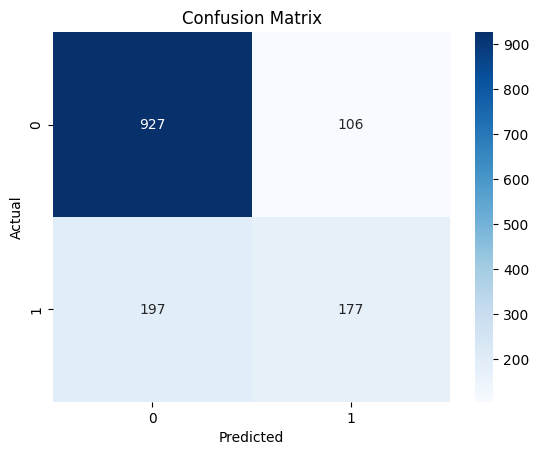

In [31]:
# Build a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()